# <center>Book: Steven Bird, Ewan Klein, Edward Loper, 2009. **Natural Language Processing (NLP) with Python**, O'Reilly.</center> 

This notebook is an exploration of the solutions proposed by the user:
    https : // github.com / Sturz gef ahr

### Chapter 5 - Categorizing and Tagging Words

##### 2.

☼ Working with someone else, take turns to pick a word that can be either a noun or a verb (e.g. *contest*); the opponent has to predict which one is likely to be the most frequent in the Brown corpus; check the opponent's prediction, and tally the score over several turns.

In [1]:
import nltk

In [2]:
btw = nltk.corpus.brown.tagged_words()
cfd = nltk.ConditionalFreqDist(btw)
likely_nouns = ["conduct", "combat", "conflict", "contest", "contract", 
                "impact", "insult", "object", "present", "progress", "project",
                "rebel", "refill", "refund", "subject"]

In [3]:
sum([cfd[ln].most_common()[0][0] == 'NN' for ln in likely_nouns])/len(likely_nouns)

0.8666666666666667

In [4]:
[(ln, cfd[ln].most_common()) for ln in likely_nouns if cfd[ln].most_common()[0][0] != 'NN']

[('present', [('JJ', 220), ('RB', 63), ('NN', 44), ('VB', 39), ('AP', 4)]),
 ('refill', [('VB', 1)])]

In [5]:
nltk.help.brown_tagset('JJ')

JJ: adjective
    ecent over-all possible hard-fought favorable hard meager fit such
    widespread outmoded inadequate ambiguous grand clerical effective
    orderly federal foster general proportionate ...


In [6]:
dual_meaning = ["conduct", "attribute", "combat", "conflict", "contest", 
                "contract", "decrease", "escort", "impact", "increase", 
                "insult", "object", "permit", "present", "proceed", "progress",
                "project", "rebel", "refill", "refund", "reject", "repeat", 
                "subject", "suspect"]
likely_verbs = [dm for dm in dual_meaning if dm not in likely_nouns]

In [7]:
sum([cfd[lv].most_common()[0][0] == 'VB' for lv in likely_verbs])/len(likely_verbs)

0.6666666666666666

In [8]:
[(lv, cfd[lv].most_common()) for lv in likely_verbs if cfd[lv].most_common()[0][0] != 'VB']

[('attribute', [('NN', 4), ('VB', 2)]),
 ('escort', [('NN', 5), ('VB', 4)]),
 ('increase', [('NN', 112), ('VB', 81), ('VB-HL', 1)])]

##### 6.

☼ Try deleting an element from a dictionary `d`, using the syntax `del d['abc']`. Check that the item was deleted.

In [9]:
d['abc']

NameError: name 'd' is not defined

In [10]:
del d['abc']

NameError: name 'd' is not defined

##### 7.

☼ Create two dictionaries, `d1` and `d2`, and add some entries to each. Now issue the command `d1.update(d2)`. What did this do? What might it be useful for?

In [11]:
d1 = {'do': 'a deer, a female deer', 're': 'a drop of golden sun'}
d2 = {'mi': 'a name I call myself', 'fa': 'a long, long way to run'}

In [12]:
d1.update(d2)
d1

{'do': 'a deer, a female deer',
 'fa': 'a long, long way to run',
 'mi': 'a name I call myself',
 're': 'a drop of golden sun'}

##### 8. 

☼ Create a dictionary `e`, to represent a single lexical entry for some word of your choice. Define keys like `headword`, `part-of-speech`, `sense`, and `example`, and assign them suitable values.

In [13]:
# winklepicker

e = {'headword': 'A style of boot with a severely pointed toe, fashionable in the 1950s.',
  'part-of-speech': 'Noun', 
  'sense': 'type of footwear', 
  'example': 'Winklepickers were very popular among mods in the 60s.'}

In [14]:
e

{'example': 'Winklepickers were very popular among mods in the 60s.',
 'headword': 'A style of boot with a severely pointed toe, fashionable in the 1950s.',
 'part-of-speech': 'Noun',
 'sense': 'type of footwear'}

##### 10. 

☼ Train a unigram tagger and run it on some new text. Observe that some words are not assigned a tag. Why not?

In [15]:
from nltk.corpus import brown
unigram_tagger = nltk.UnigramTagger(brown.tagged_sents())

In [16]:
test = "this shouldn't be too difficult"
unigram_tagger.tag(test.split())

[('this', 'DT'),
 ("shouldn't", 'MD*'),
 ('be', 'BE'),
 ('too', 'QL'),
 ('difficult', 'JJ')]

In [17]:
test2 = """
        this should be a bit more of a challenge, 
        as they didn't have blogs when the corpus
        was compiled
        """
unigram_tagger.tag(test2.split())

[('this', 'DT'),
 ('should', 'MD'),
 ('be', 'BE'),
 ('a', 'AT'),
 ('bit', 'NN'),
 ('more', 'QL'),
 ('of', 'IN'),
 ('a', 'AT'),
 ('challenge,', None),
 ('as', 'CS'),
 ('they', 'PPSS'),
 ("didn't", 'DOD*'),
 ('have', 'HV'),
 ('blogs', None),
 ('when', 'WRB'),
 ('the', 'AT'),
 ('corpus', 'NN'),
 ('was', 'BEDZ'),
 ('compiled', 'VBN')]

In [18]:
cfd = nltk.ConditionalFreqDist(brown.tagged_words())
cfd['challenge']

FreqDist({'NN': 21, 'VB': 14})

In [19]:
cfd['escort']

FreqDist({'NN': 5, 'VB': 4})

In [20]:
test3 = 'what about the word escort'
unigram_tagger.tag(test3.split())

[('what', 'WDT'),
 ('about', 'IN'),
 ('the', 'AT'),
 ('word', 'NN'),
 ('escort', 'NN')]

##### 11.

☼ Learn about the affix tagger (type `help(nltk.AffixTagger)`). Train an affix tagger and run it on some new text. Experiment with different settings for the affix length and the minimum word length. Discuss your findings.

In [21]:
help(nltk.AffixTagger)

Help on class AffixTagger in module nltk.tag.sequential:

class AffixTagger(ContextTagger)
 |  AffixTagger(train=None, model=None, affix_length=-3, min_stem_length=2, backoff=None, cutoff=0, verbose=False)
 |  
 |  A tagger that chooses a token's tag based on a leading or trailing
 |  substring of its word string.  (It is important to note that these
 |  substrings are not necessarily "true" morphological affixes).  In
 |  particular, a fixed-length substring of the word is looked up in a
 |  table, and the corresponding tag is returned.  Affix taggers are
 |  typically constructed by training them on a tagged corpus.
 |  
 |  Construct a new affix tagger.
 |  
 |  :param affix_length: The length of the affixes that should be
 |      considered during training and tagging.  Use negative
 |      numbers for suffixes.
 |  :param min_stem_length: Any words whose length is less than
 |      min_stem_length+abs(affix_length) will be assigned a
 |      tag of None by this tagger.
 |  
 |  Me

In [22]:
%matplotlib inline

In [23]:
import matplotlib.pyplot as plt
import numpy as np

brown_tagged_sents = brown.tagged_sents(categories = 'news')
brown_sents = brown.sents(categories = 'news')

def performance(affix_size):
    affix_tagger = nltk.AffixTagger(brown_tagged_sents, affix_length = affix_size)
    return affix_tagger.evaluate(brown_tagged_sents)

def display():
    sizes = np.arange(-5, 6)
    perfs = [performance(size) for size in sizes]
    plt.plot(sizes, perfs, '-bo')
    plt.title('Affix Tagger Performance with Varying Affix Length')
    plt.xlabel('Affix Length')
    plt.ylabel('Performance')
    plt.show()

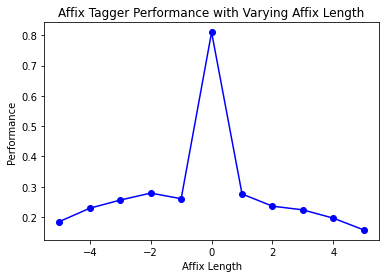

In [24]:
display()

##### 12. 

☼ Train a bigram tagger with no backoff tagger, and run it on some of the training data. Next, run it on some new data. What happens to the performance of the tagger? Why?

In [25]:
size = int(len(brown_tagged_sents) * 0.9)

train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.evaluate(train_sents)

0.7884137382485832

In [26]:
bigram_tagger.evaluate(test_sents)

0.10206319146815508

##### 13.

☼ We can use a dictionary to specify the values to be substituted into a formatting string. Read Python's library documentation for formatting strings  and use this method to display today's date in two different formats.

In [27]:
date = {'month': '11', 'date': '06', 'day': 'Wednesday', 'year': '2019'}

print("European style: {}, {}.{}.{}".format(date['day'], date['date'], 
                                            date['month'], date['year']))
print("American style: {}, {}/{}/{}".format(date['day'], date['month'],
                                            date['date'], date['year']))
print("Asian style: {}, {}.{}.{}".format(date['day'], date['year'],
                                         date['month'], date['date']))

European style: Wednesday, 06.11.2019
American style: Wednesday, 11/06/2019
Asian style: Wednesday, 2019.11.06


##### 14.

◑ Use `sorted()` and `set()` to get a sorted list of tags used in the Brown corpus, removing duplicates.

In [28]:
print(sorted(set([t for (_, t) in brown.tagged_words()])), end = '')

["'", "''", '(', '(-HL', ')', ')-HL', '*', '*-HL', '*-NC', '*-TL', ',', ',-HL', ',-NC', ',-TL', '--', '---HL', '.', '.-HL', '.-NC', '.-TL', ':', ':-HL', ':-TL', 'ABL', 'ABN', 'ABN-HL', 'ABN-NC', 'ABN-TL', 'ABX', 'AP', 'AP$', 'AP+AP-NC', 'AP-HL', 'AP-NC', 'AP-TL', 'AT', 'AT-HL', 'AT-NC', 'AT-TL', 'AT-TL-HL', 'BE', 'BE-HL', 'BE-TL', 'BED', 'BED*', 'BED-NC', 'BEDZ', 'BEDZ*', 'BEDZ-HL', 'BEDZ-NC', 'BEG', 'BEM', 'BEM*', 'BEM-NC', 'BEN', 'BEN-TL', 'BER', 'BER*', 'BER*-NC', 'BER-HL', 'BER-NC', 'BER-TL', 'BEZ', 'BEZ*', 'BEZ-HL', 'BEZ-NC', 'BEZ-TL', 'CC', 'CC-HL', 'CC-NC', 'CC-TL', 'CC-TL-HL', 'CD', 'CD$', 'CD-HL', 'CD-NC', 'CD-TL', 'CD-TL-HL', 'CS', 'CS-HL', 'CS-NC', 'CS-TL', 'DO', 'DO*', 'DO*-HL', 'DO+PPSS', 'DO-HL', 'DO-NC', 'DO-TL', 'DOD', 'DOD*', 'DOD*-TL', 'DOD-NC', 'DOZ', 'DOZ*', 'DOZ*-TL', 'DOZ-HL', 'DOZ-TL', 'DT', 'DT$', 'DT+BEZ', 'DT+BEZ-NC', 'DT+MD', 'DT-HL', 'DT-NC', 'DT-TL', 'DTI', 'DTI-HL', 'DTI-TL', 'DTS', 'DTS+BEZ', 'DTS-HL', 'DTX', 'EX', 'EX+BEZ', 'EX+HVD', 'EX+HVZ', 'EX+MD', '